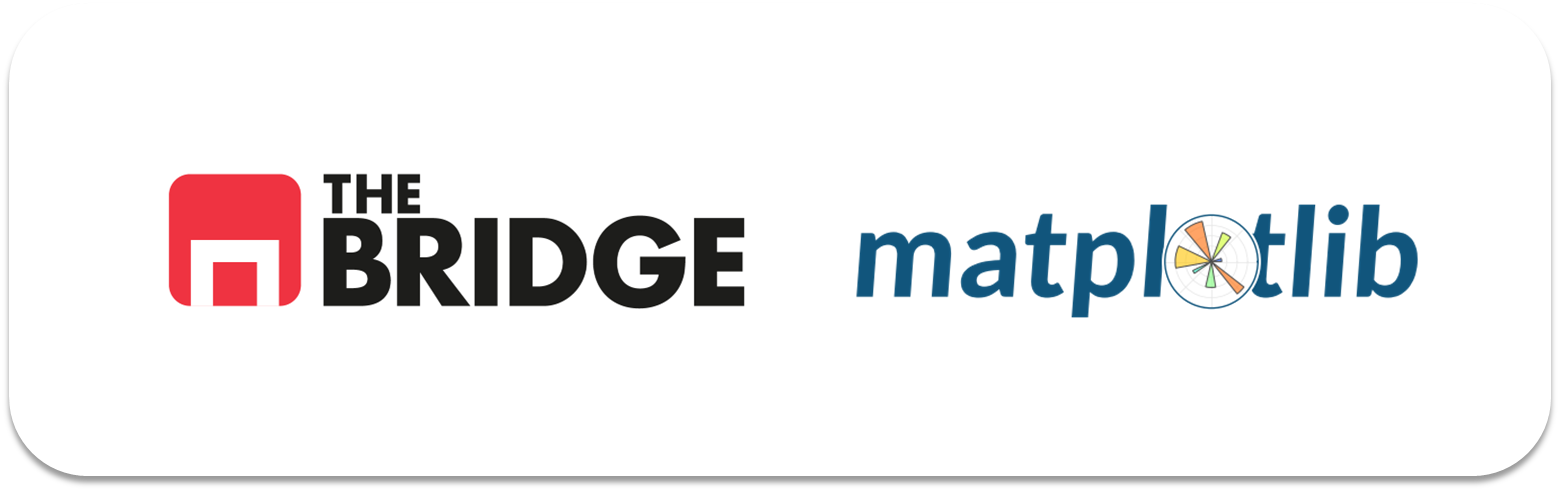

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
plt.style.use('seaborn-v0_8-white')
import numpy as np
import pandas as pd
import seaborn as sns

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [32]:
casas = pd.read_csv('./data/california_cities.csv')
casas = casas.dropna()
print(casas.head(10))
print(casas.info())
casas

    Unnamed: 0            city       latd       longd  elevation_m  \
0            0        Adelanto  34.576111 -117.432778        875.0   
1            1     AgouraHills  34.153333 -118.761667        281.0   
4            4        Alhambra  34.081944 -118.135000        150.0   
5            5      AlisoViejo  33.575000 -117.725556        127.0   
6            6         Alturas  41.487222 -120.542500       1332.0   
7            7      AmadorCity  38.419444 -120.824167        280.0   
8            8  AmericanCanyon  38.168056 -122.252500         14.0   
9            9         Anaheim  33.836111 -117.889722         48.0   
10          10        Anderson  40.452222 -122.296667        132.0   
11          11      AngelsCamp  38.068333 -120.539722        420.0   

    elevation_ft  population_total  area_total_sq_mi  area_land_sq_mi  \
0         2871.0             31765            56.027           56.009   
1          922.0             20330             7.822            7.793   
4         

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

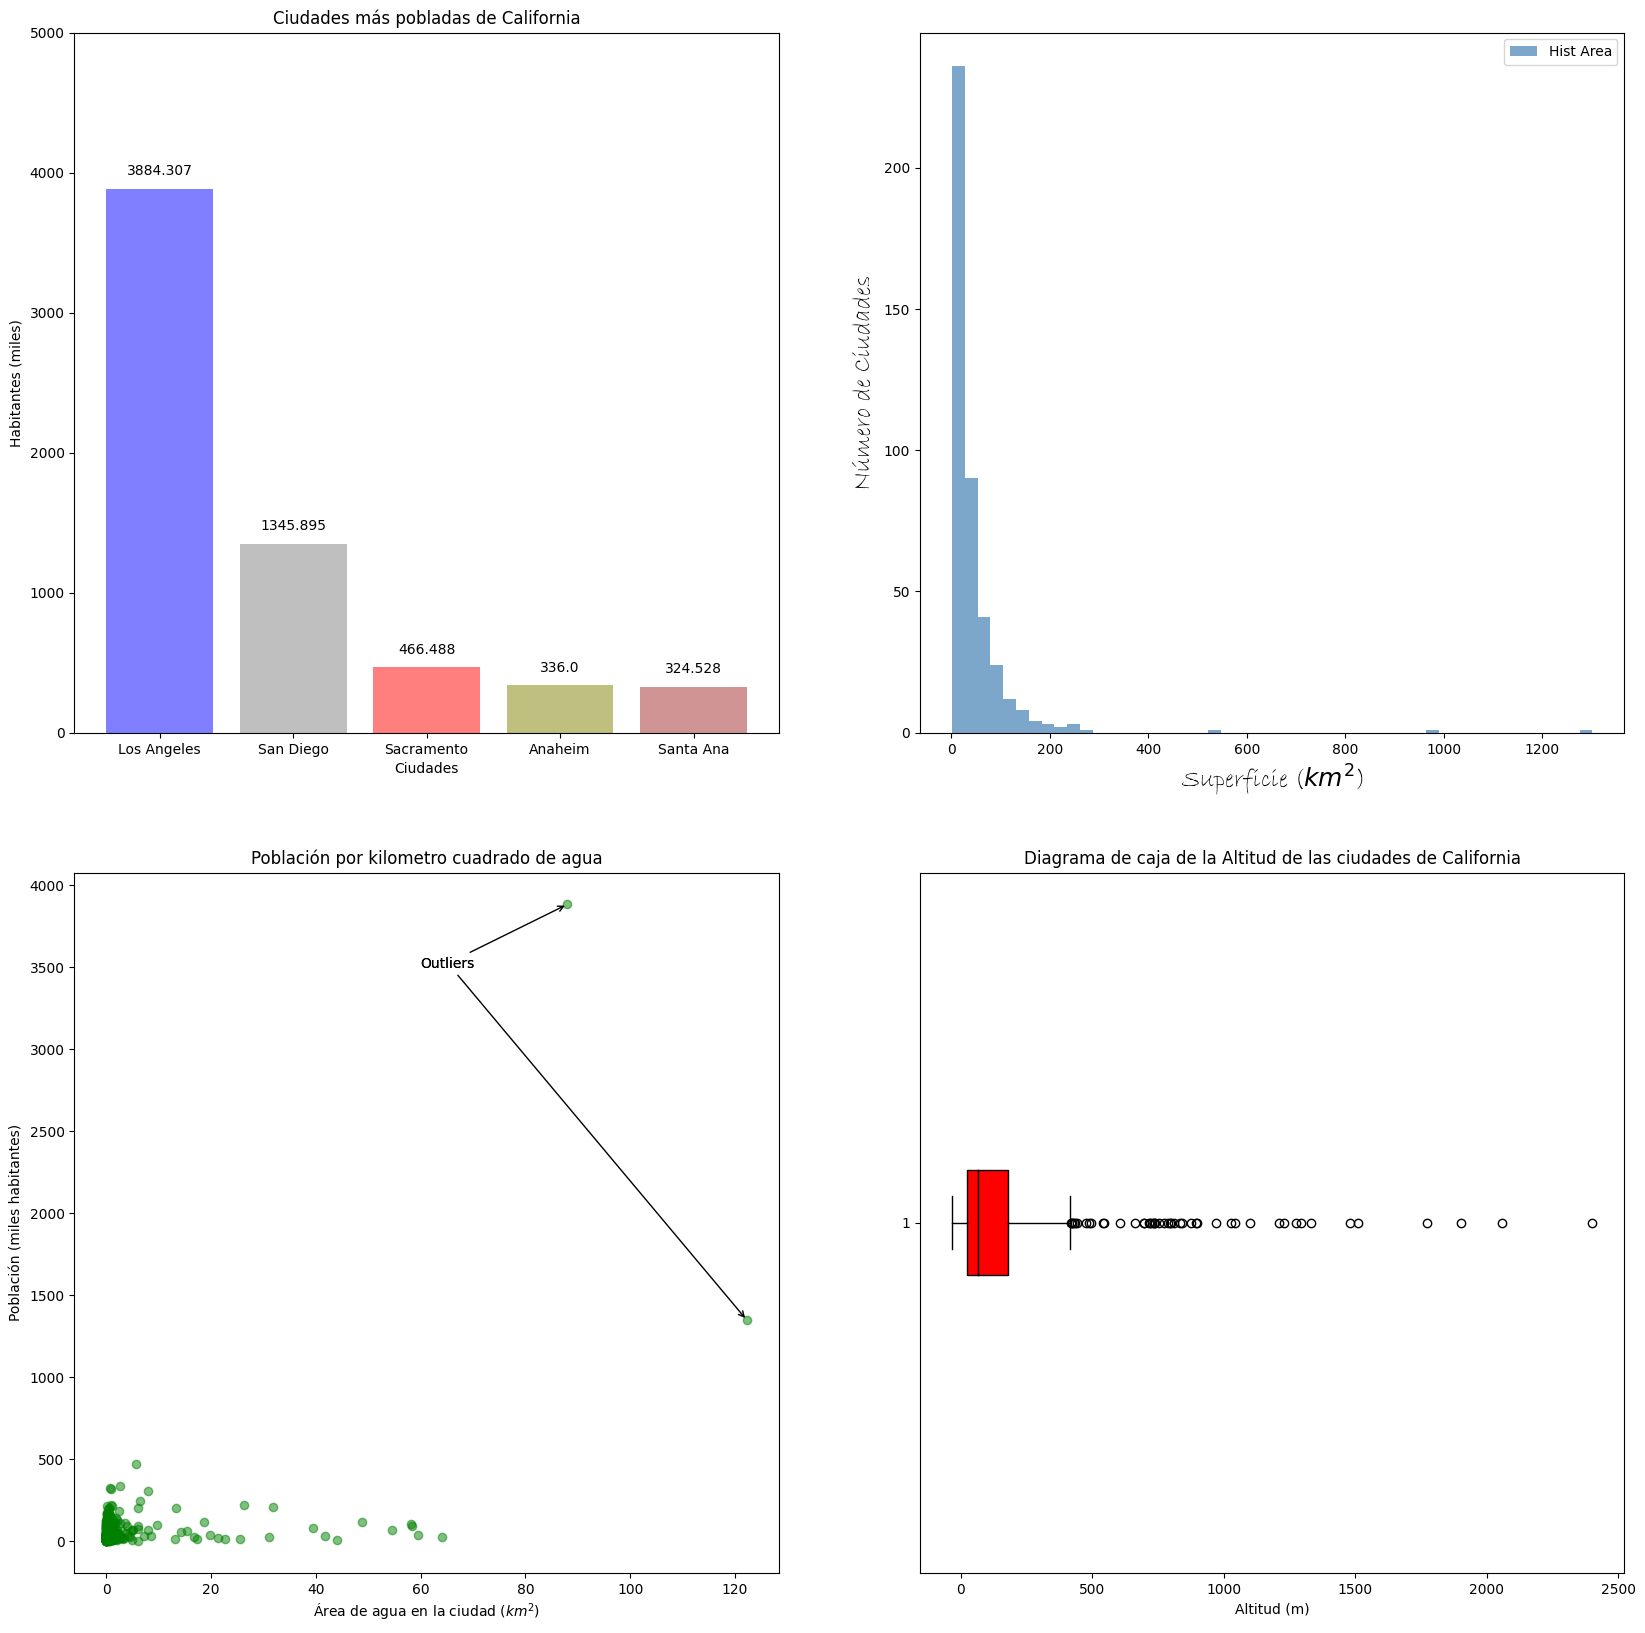

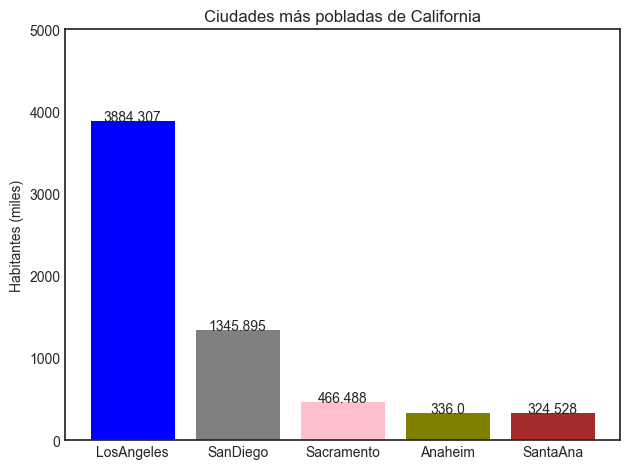

In [33]:
top_ciudades_pobladas = casas.nlargest(5,'population_total')
top_ciudades_pobladas['population_total'] /= 1000
plt.figure()
plt.bar(top_ciudades_pobladas['city'], top_ciudades_pobladas['population_total'], color=['blue', 'gray','pink', 'olive', 'brown'], alpha=1)
plt.xlabel('')
plt.ylim([0,5000])
plt.ylabel('Habitantes (miles)')
plt.title('Ciudades más pobladas de California')
# plt.ticklabel_format(axis='y', style='plain')
for i, txt in enumerate(top_ciudades_pobladas['population_total']):
    plt.text(i, txt, str(txt), ha='center')
   
plt.savefig('./data/fig1.png')
plt.tight_layout()
plt.show()

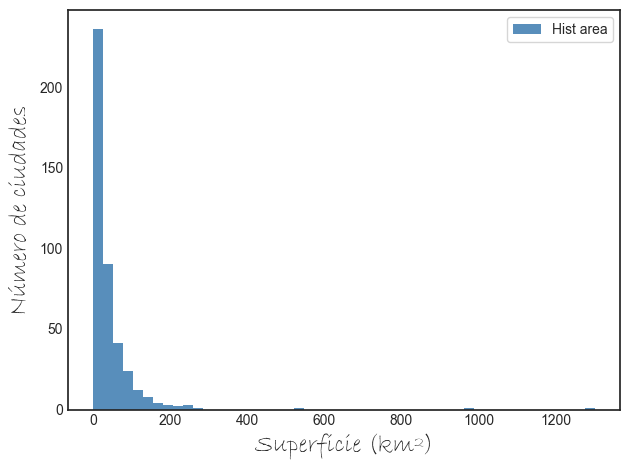

In [34]:
plt.figure()
plt.hist(casas['area_total_km2'], bins=50, alpha = 0.9, color='steelblue', label = 'Hist area')
plt.xlabel('Superficie (km²)', fontsize=18, fontname='Bradley Hand ITC')
plt.ylabel('Número de ciudades', fontsize=18, fontname='Bradley Hand ITC')
plt.legend(frameon= True);
plt.savefig('./data/fig2.png')
plt.tight_layout();



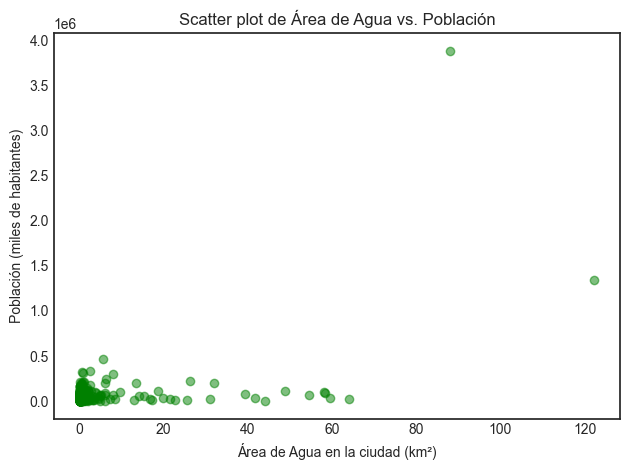

In [35]:
fig3 = plt.figure()
plt.scatter(casas['area_water_km2'], casas['population_total'], color='green', alpha=0.5)
plt.xlabel('Área de Agua en la ciudad (km²)')
plt.ylabel('Población (miles de habitantes)')
plt.title('Scatter plot de Área de Agua vs. Población')
plt.savefig('./data/fig3.png')
plt.tight_layout()

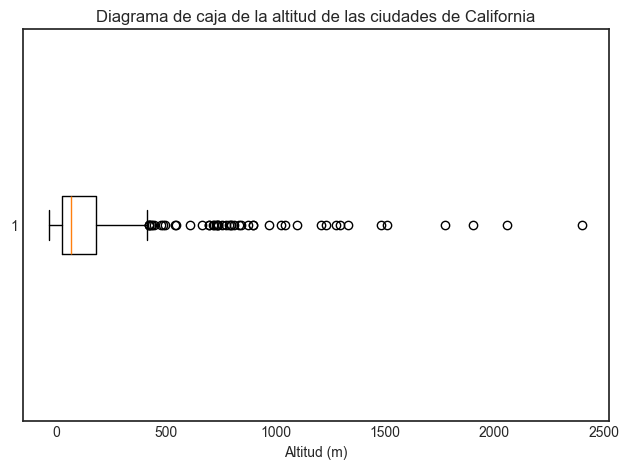

In [36]:
fig4 = plt.figure()
plt.boxplot(casas['elevation_m'], vert = False)
plt.xlabel('Altitud (m)')
plt.title('Diagrama de caja de la altitud de las ciudades de California')
plt.savefig('./data/fig4.png')
plt.tight_layout()

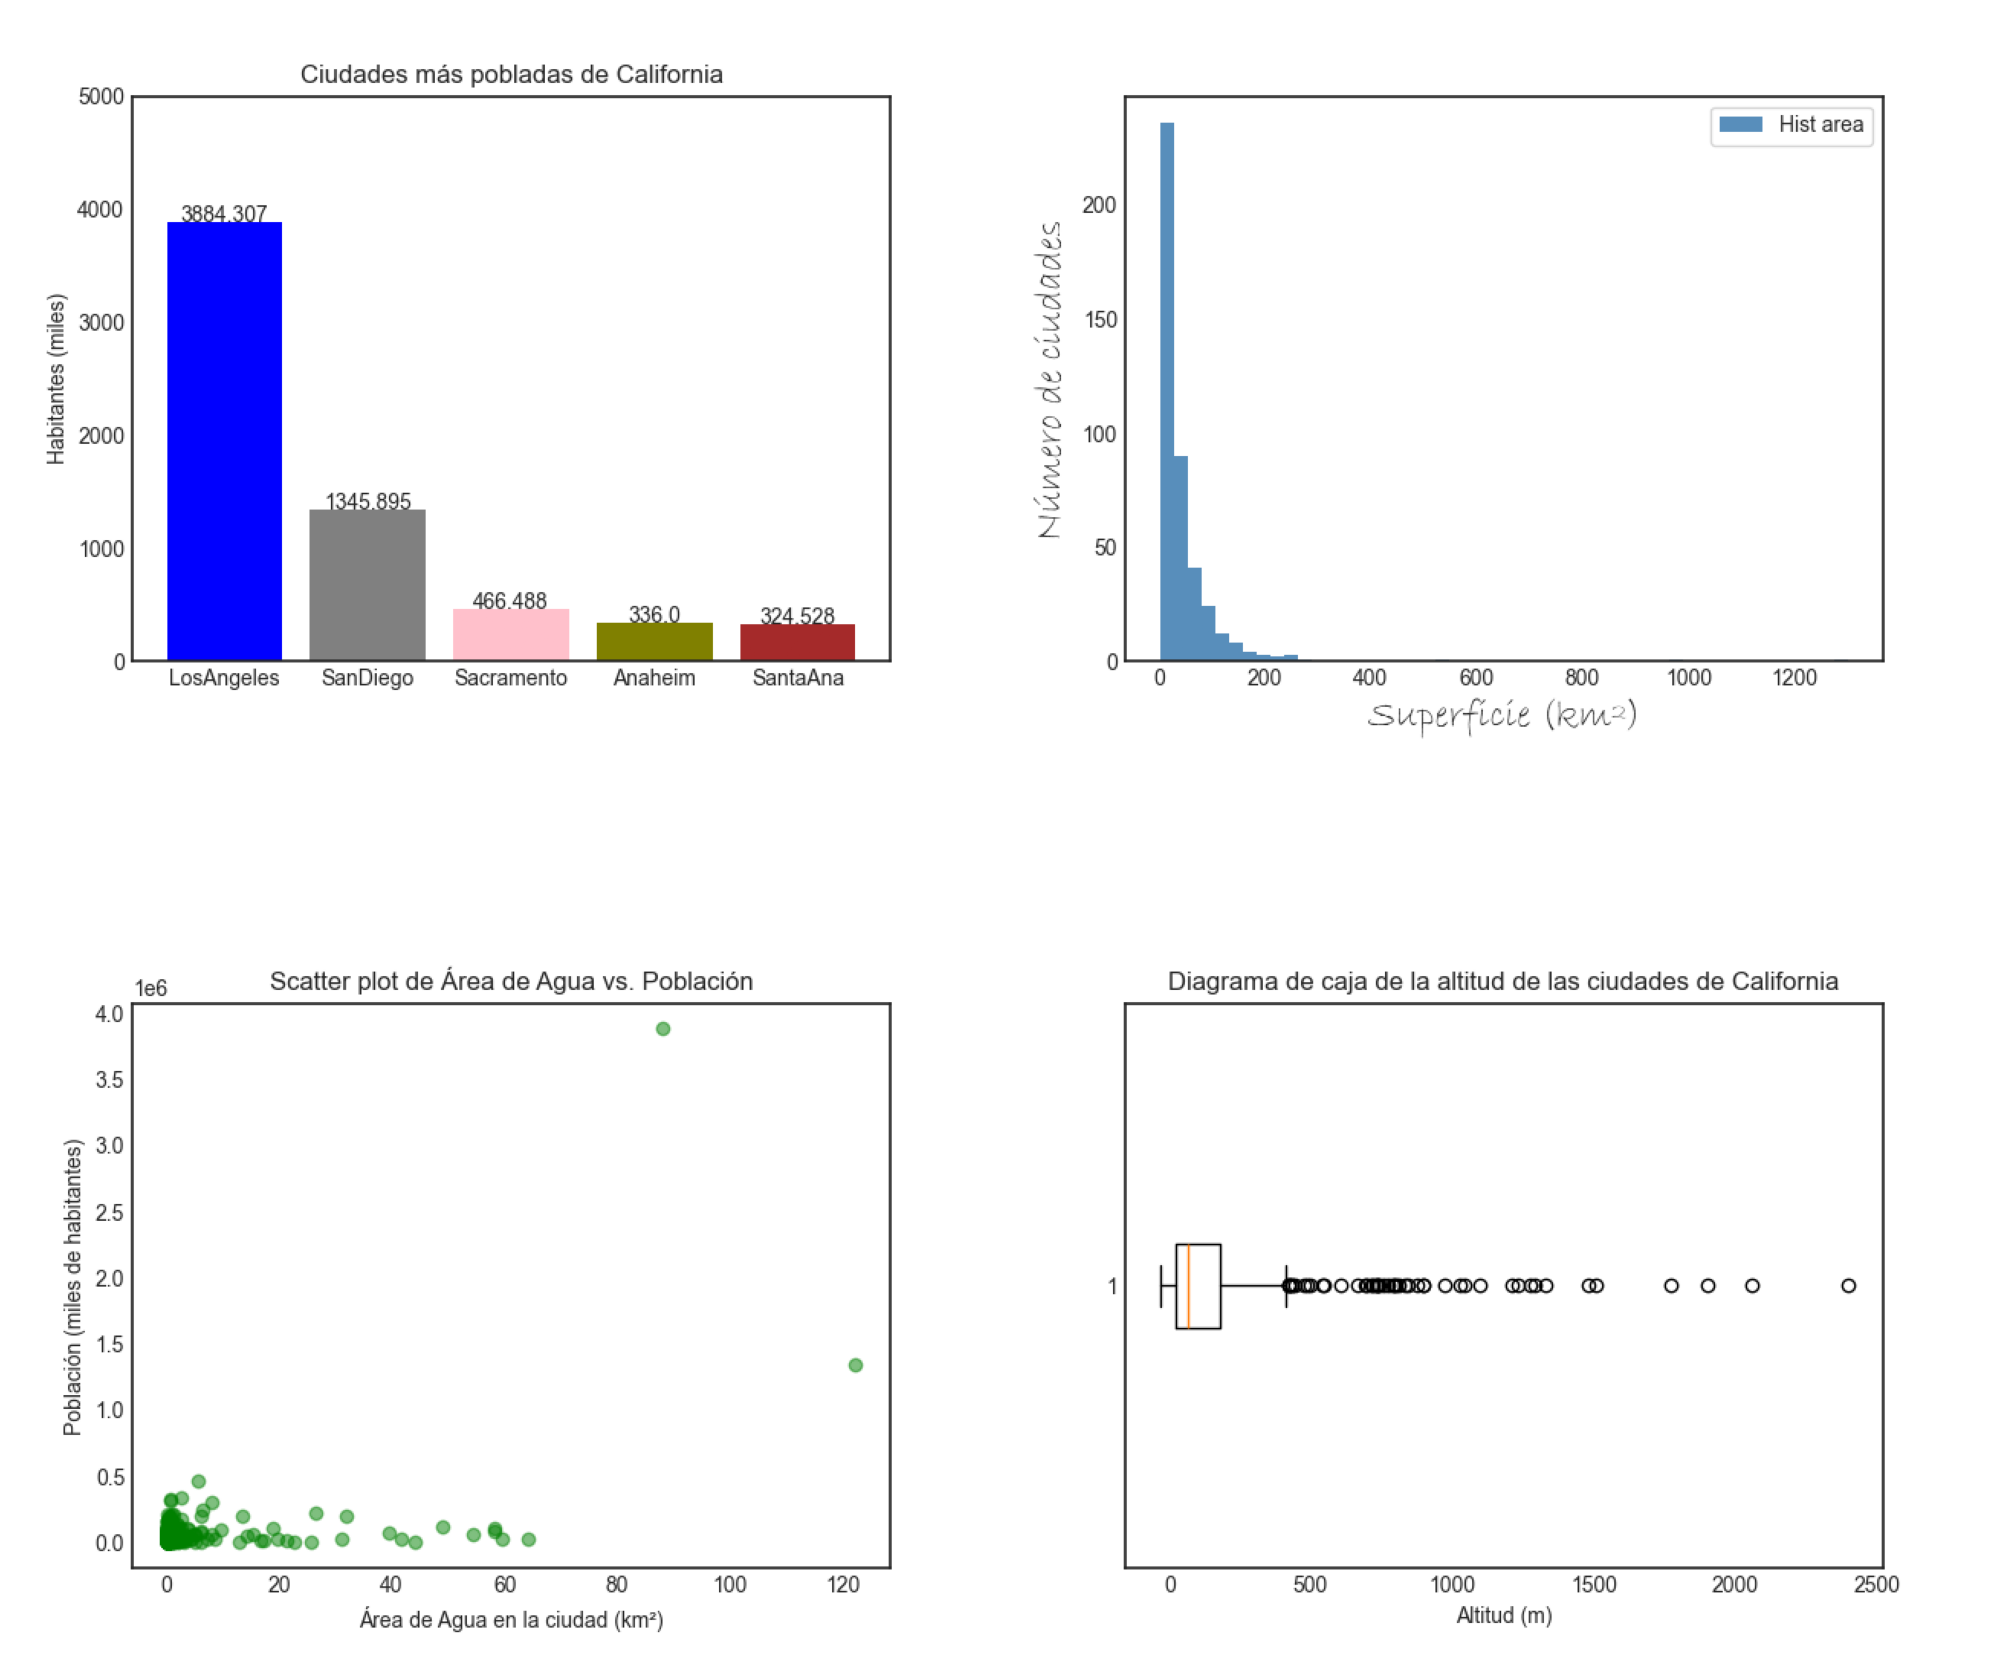

In [37]:
# Crear una nueva figura con cuatro ejes
fig, axs = plt.subplots(2, 2, figsize=(20,20))

# Dibujar cada figura en un eje diferente
axs[0, 0].imshow(plt.imread('./data/fig1.png'))
axs[0, 1].imshow(plt.imread('./data/fig2.png'))
axs[1, 0].imshow(plt.imread('./data/fig3.png'))
axs[1, 1].imshow(plt.imread('./data/fig4.png'))

for ax_row in axs:
    for ax in ax_row:
        ax.axis('off')
        
plt.tight_layout()
plt.savefig('./data/combined_figures.png')
plt.show()

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [38]:
#lo hice en cada figura 
# el enlace a la imagen en el repositorio https://github.com/Juanxetee/DS_Online_Feb24_Exercises/blob/main/03_Analisis_de_Datos/Sprint_08/Unidad_01/Practica_Obligatoria/data/combined_figures.png
# no sé si había que subirlo por separado, pensé que era mejor tenerlo junto por orden.